In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [3]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/KhuonMat/Train', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 123 images belonging to 4 classes.


In [4]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/KhuonMat/Vailidation', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 123 images belonging to 4 classes.


In [5]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Binh': 0, 'Dung': 1, 'Hau': 2, 'Trong': 3}

In [6]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Binh': 0, 'Dung': 1, 'Hau': 2, 'Trong': 3}

In [7]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2)) 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 4 tín hiệu ra
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [8]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=20,batch_size=64,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/20
4/4 [==============================] - 51s 10s/step - loss: 5.6009 - accuracy: 0.2764 - val_loss: 1.4688 - val_accuracy: 0.2520
Epoch 2/20
4/4 [==============================] - 5s 2s/step - loss: 1.1395 - accuracy: 0.4715 - val_loss: 0.7630 - val_accuracy: 0.7317
Epoch 3/20
4/4 [==============================] - 7s 2s/step - loss: 0.5188 - accuracy: 0.8455 - val_loss: 0.1996 - val_accuracy: 0.9106
Epoch 4/20
4/4 [==============================] - 7s 2s/step - loss: 0.2518 - accuracy: 0.9106 - val_loss: 0.2457 - val_accuracy: 0.9431
Epoch 5/20
4/4 [==============================] - 7s 2s/step - loss: 0.1489 - accuracy: 0.9593 - val_loss: 0.0426 - val_accuracy: 0.9919
Epoch 6/20
4/4 [==============================] - 6s 2s/step - loss: 0.3077 - accuracy: 0.9187 - val_loss: 0.2911 - val_accuracy: 0.8699
Epoch 7/20
4/4 [==============================] - 6s 2s/step - loss: 0.2062 - accuracy: 0.9350 - val_loss: 0.0870 - val_accuracy: 0.9675
Epoch 8/20
4/4 [=======================

In [9]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0003717254148796201
Train Accuracy 1.0


<function matplotlib.pyplot.show(close=None, block=None)>

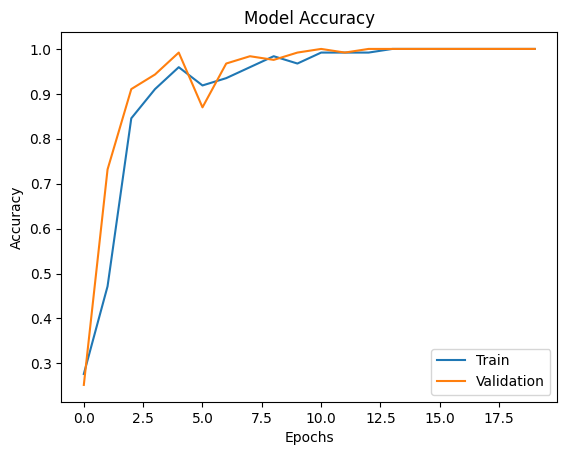

In [10]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [11]:
# Lưu lại
model.save("/content/drive/MyDrive/KhuonMat/khuonmat.h5")

In [12]:
# Tải mô hình 
model_CNN=load_model('/content/drive/MyDrive/KhuonMat/khuonmat.h5')

1/1 [==============================] - 0s 387ms/step
Binh


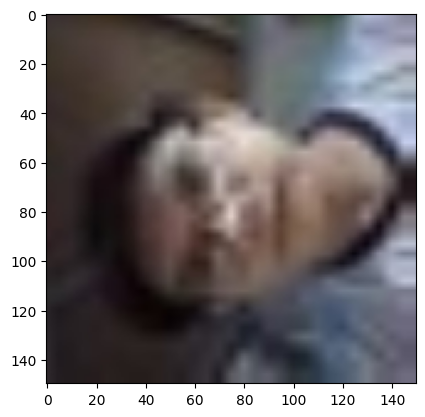

In [13]:
img=load_img("/content/drive/MyDrive/KhuonMat/Test/Binh/Binh 10.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Binh'
if round(result[0][1])==1:
  prediction='Dung'
if round(result[0][2])==1:
  prediction='Hau'
if round(result[0][3])==1:
  prediction='Trong'
print(prediction)

1/1 [==============================] - 0s 22ms/step
Dung


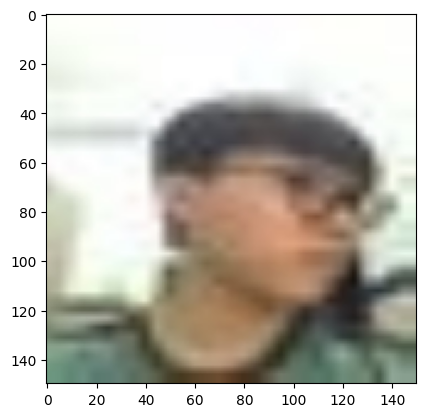

In [14]:
img=load_img("/content/drive/MyDrive/KhuonMat/Test/Dung/Dung 10.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Binh'
if round(result[0][1])==1:
  prediction='Dung'
if round(result[0][2])==1:
  prediction='Hau'
if round(result[0][3])==1:
  prediction='Trong'
print(prediction)

1/1 [==============================] - 0s 19ms/step
Trong


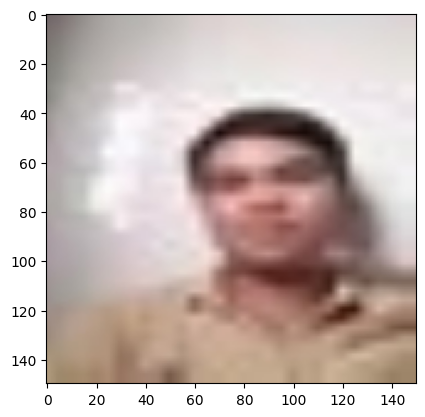

In [15]:
img=load_img("/content/drive/MyDrive/KhuonMat/Test/Trong/Trong 17.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='Binh'
if round(result[0][1])==1:
  prediction='Dung'
if round(result[0][2])==1:
  prediction='Hau'
if round(result[0][3])==1:
  prediction='Trong'
print(prediction)

In [17]:
import sys
sys.path.append("drive")
import os
os.chdir('drive/My Drive/Colab Notebooks')

In [19]:
! pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
! conda install -c anaconda nbconvert
# convert KuraSiva2.ipynb to Latex:

/bin/bash: conda: command not found


In [20]:
! jupyter nbconvert --to latex NhanDienKhuonMat.ipynb

[NbConvertApp] Converting notebook NhanDienKhuonMat.ipynb to latex
[NbConvertApp] Support files will be in NhanDienKhuonMat_files/
[NbConvertApp] Making directory NhanDienKhuonMat_files
[NbConvertApp] Making directory NhanDienKhuonMat_files
[NbConvertApp] Making directory NhanDienKhuonMat_files
[NbConvertApp] Making directory NhanDienKhuonMat_files
[NbConvertApp] Writing 58842 bytes to NhanDienKhuonMat.tex
